In [16]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import *



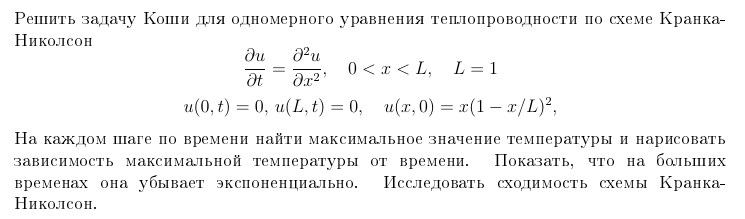

In [17]:
from IPython.display import Image
Image('task 10.png')

Dirichlet problem.
Explicit solution: p70
Crank–Nicolson = 1/2 * sum(explicit+implicit)
Precision: (97); (99)
Stability: p76

In [18]:
L = 1
N = 700     # Number of points for x
M = 10000   # Number of points for t


h = L / N
tau = 0.0001

u0 = lambda x: x * (1. - x / L) ** 2

In [19]:
x = np.linspace(0, L, N)
plt.plot(x, u0(x))

<IPython.core.display.Javascript object>

Method is describes on the page 76

In [20]:
def TridiagonalMatrix(p): # Sweeping method
    r = tau / h ** 2

    A = [0] + [-r for _ in range(N-2)] + [0]
    B = [1] + [2+2*r  for i in range(N-2)] + [1]
    C = [0] + [-r for _ in range(N-2)] + [0]

    D = [p[0]] + [r*p[i-1] + (2-2*r)*p[i] + r*p[i+1] for i in range(1, N-1)] + [p[-1]]

    # Forward step
    for i in range(1, N):
        xi = A[i] / B[i - 1]
        B[i] -= xi * C[i - 1]
        D[i] -= xi * D[i - 1]

    # Reverse step
    y = np.zeros(N)
    y[N - 1] = D[N - 1] / B[N - 1] # обратный ход метода Гаусса
    for i in np.arange(N - 2, -1, -1):
        y[i] = (D[i] - C[i] * y[i + 1]) / B[i]
    return y

In [23]:
x = np.linspace(0, L, N)

data = np.zeros((M, N))
data[0] = u0(x)

x_max = np.zeros(M)
u_max = np.zeros(M)

x_max[0] = x[data[0].argmax()]  # Find x in which u0 == max
u_max[0] = data[0].max()        # Get max(u0)

for i in range(1, M):
    data[i] = TridiagonalMatrix(data[i - 1])
    x_max[i], u_max[i] = x[data[i].argmax()], data[i].max()

In [ ]:
fig = plt.figure()

ax1 = fig.add_subplot()

line1, = ax1.plot(x, data[0])   # Temperature on current step
line2, = ax1.plot(x_max, u_max) # Maximums of temperature

plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('T(x)')
plt.grid()

def update(t):
    line1.set_ydata(data[t])
    fig.canvas.draw_idle()

interact(update, t=(0, M - 1));

<IPython.core.display.Javascript object>

interactive(children=(IntSlider(value=4999, description='t', max=9999), Output()), _dom_classes=('widget-inter…

In [33]:
T = [i * tau for i in range(M)]
plt.figure(figsize=(6,3))

plt.plot(T, u_max)
plt.yscale('log')
plt.title('Max(T(t))')
plt.xlabel('t')
plt.ylabel('u_max')
plt.grid()

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>